In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import scipy.io
import scipy
plt.figure(figsize=(20,5));

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

<Figure size 1440x360 with 0 Axes>

In [2]:
working_dir = "C:\\Users\\Aniket3.Kulkarni\\Desktop\\battery"
gen = os.walk(working_dir)
dirs = next(os.walk('.'))[1]

In [3]:
mat = scipy.io.loadmat(dirs[1]+'\\'+'RW9.mat')
mat = mat['data'][0][0][0][0]
df = pd.DataFrame(mat)
ref_discharge = df[df['comment'] == 'reference discharge']
ref_discharge.head()

,comment,type,time,relativeTime,voltage,current,temperature,date
1,[reference discharge],[D],"[[10509.699999999999, 10519.7, 10529.7, 10539....","[[0.04, 10.04, 20.04, 30.04, 40.04, 50.04, 60....","[[4.113, 4.099, 4.091, 4.085, 4.079, 4.075, 4....","[[1.004, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1....","[[22.10602, 22.05919, 22.04357, 22.01235, 21.9...",[06-Jan-2014 16:31:49]
3,[reference discharge],[D],"[[28575.879999999997, 28585.88, 28595.88, 2860...","[[0.04, 10.04, 20.04, 30.04, 40.04, 50.04, 60....","[[4.113, 4.099, 4.091, 4.085, 4.079, 4.074, 4....","[[1.003, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1....","[[22.55875, 22.55875, 22.57436, 22.60559, 22.6...",[06-Jan-2014 21:32:56]
3031,[reference discharge],[D],"[[427288.81999999995, 427298.82, 427308.82, 42...","[[0.04, 10.04, 20.04, 30.04, 40.04, 50.04, 60....","[[4.11, 4.094, 4.085, 4.077, 4.071, 4.066, 4.0...","[[1.005, 1.0, 1.0, 1.0, 1.0, 1.0, 1.001, 1.0, ...","[[22.63681, 22.63681, 22.65242, 22.66803, 22.6...",[11-Jan-2014 12:30:19]
3033,[reference discharge],[D],"[[446909.27, 446919.26999999996, 446929.27, 44...","[[0.04, 10.04, 20.04, 30.04, 40.04, 50.04, 60....","[[4.109, 4.093, 4.084, 4.076, 4.07, 4.065, 4.0...","[[1.006, 0.999, 0.999, 1.0, 1.0, 1.0, 1.001, 1...","[[22.15285, 22.16847, 22.18408, 22.2153, 22.23...",[11-Jan-2014 17:57:21]
6057,[reference discharge],[D],"[[830934.71, 830944.71, 830954.7100000001, 830...","[[0.04, 10.04, 20.04, 30.04, 40.04, 50.04, 60....","[[4.106, 4.088, 4.078, 4.071, 4.064, 4.058, 4....","[[1.005, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1....","[[21.73134, 21.73134, 21.76257, 21.77818, 21.7...",[16-Jan-2014 04:50:19]


In [66]:
df.head(10)

,comment,type,time,relativeTime,voltage,current,temperature,date
0,[reference charge],[C],"[[5.04, 15.04, 25.04, 35.04, 45.04, 55.04, 65....","[[0.04, 10.04, 20.04, 30.04, 40.04, 50.04, 60....","[[3.838, 3.865, 3.878, 3.888, 3.895, 3.9, 3.90...","[[-2.007, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, ...","[[24.3853, 24.3853, 24.29163, 24.2448, 24.2604...",[06-Jan-2014 13:36:43]
1,[reference discharge],[D],"[[10509.699999999999, 10519.7, 10529.7, 10539....","[[0.04, 10.04, 20.04, 30.04, 40.04, 50.04, 60....","[[4.113, 4.099, 4.091, 4.085, 4.079, 4.075, 4....","[[1.004, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1....","[[22.10602, 22.05919, 22.04357, 22.01235, 21.9...",[06-Jan-2014 16:31:49]
2,[reference charge],[C],"[[18062.29, 18072.29, 18082.29, 18092.29, 1810...","[[0.03, 10.03, 20.03, 30.03, 40.03, 50.03, 60....","[[3.492, 3.601, 3.651, 3.69, 3.723, 3.751, 3.7...","[[-2.01, -2.0, -2.0, -2.0, -2.001, -2.0, -2.0,...","[[27.49199, 27.5076, 27.5076, 27.47638, 27.445...",[06-Jan-2014 18:37:42]
3,[reference discharge],[D],"[[28575.879999999997, 28585.88, 28595.88, 2860...","[[0.04, 10.04, 20.04, 30.04, 40.04, 50.04, 60....","[[4.113, 4.099, 4.091, 4.085, 4.079, 4.074, 4....","[[1.003, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1....","[[22.55875, 22.55875, 22.57436, 22.60559, 22.6...",[06-Jan-2014 21:32:56]
4,[pulsed load (rest)],[R],"[[46858.079999999994, 46859.079999999994, 4686...","[[0.01, 1.01, 2.01, 3.01, 4.01, 5.01, 6.01, 7....","[[4.199, 4.199, 4.199, 4.199, 4.199, 4.199, 4....","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[22.99587, 22.98026, 22.98026, 22.98026, 22.9...",[07-Jan-2014 02:37:40]
5,[pulsed load (discharge)],[D],"[[48058.11, 48059.11, 48060.11, 48061.11, 4806...","[[0.04, 1.04, 2.04, 3.04, 4.04, 5.04, 6.04, 7....","[[4.112, 4.108, 4.107, 4.105, 4.104, 4.103, 4....","[[1.005, 0.999, 1.0, 0.999, 1.0, 1.0, 1.0, 1.0...","[[23.13638, 23.13638, 23.13638, 23.13638, 23.1...",[07-Jan-2014 02:57:41]
6,[pulsed load (rest)],[R],"[[48658.079999999994, 48659.079999999994, 4866...","[[0.01, 1.01, 2.01, 3.01, 4.01, 5.01, 6.01, 7....","[[4.062, 4.07, 4.072, 4.074, 4.075, 4.076, 4.0...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[23.77645, 23.77645, 23.77645, 23.77645, 23.7...",[07-Jan-2014 03:07:41]
7,[pulsed load (discharge)],[D],"[[49858.11, 49859.11, 49860.11, 49861.11, 4986...","[[0.04, 1.04, 2.04, 3.04, 4.04, 5.04, 6.04, 7....","[[4.034, 4.03, 4.028, 4.026, 4.025, 4.024, 4.0...","[[1.005, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1....","[[23.12077, 23.13638, 23.13638, 23.13638, 23.1...",[07-Jan-2014 03:27:41]
8,[pulsed load (rest)],[R],"[[50458.079999999994, 50459.079999999994, 5046...","[[0.01, 1.01, 2.01, 3.01, 4.01, 5.01, 6.01, 7....","[[3.988, 3.997, 3.998, 4.0, 4.002, 4.003, 4.00...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[23.96379, 23.96379, 23.96379, 23.96379, 23.9...",[07-Jan-2014 03:37:41]
9,[pulsed load (discharge)],[D],"[[51658.11, 51659.11, 51660.11, 51661.11, 5166...","[[0.04, 1.04, 2.04, 3.04, 4.04, 5.04, 6.04, 7....","[[3.967, 3.963, 3.961, 3.959, 3.957, 3.956, 3....","[[1.003, 1.0, 0.999, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[20.27947, 20.27947, 20.27947, 20.27947, 20.2...",[07-Jan-2014 03:57:41]


In [4]:
def get_timeline(name): 
    mat = scipy.io.loadmat(name)
    mat = mat['data'][0][0][0][0]
    df = pd.DataFrame(mat)
    ref_discharge = df[df['comment'] == 'reference discharge']
    time = [str(i[0]) for i in ref_discharge['date']]
    ref_discharge.index = pd.to_datetime(time)

    return ref_discharge.index.max(), ref_discharge.index.min(), ref_discharge.index.max() - ref_discharge.index.min()

In [5]:
def get_capacity(name): 
    mat = scipy.io.loadmat(name)
    mat = mat['data'][0][0][0][0]
    df = pd.DataFrame(mat)
    ref_discharge = df[df['comment'] == 'reference discharge']
    time = np.array([i[0][-1] for i in ref_discharge['time']])
    # ref_discharge.index = pd.to_datetime(time)

    cap = []
    for i, row in ref_discharge.iterrows():
        cap.append(np.trapz(row['current'][0], row['relativeTime'][0]))
    cap = np.array(cap/max(cap))
    cap, time = cap[np.where(cap>0.1)], time[np.where(cap>0.1)]
    #cap, time = cap[np.where(time>1.25e6)], time[np.where(time>1.25e6)]
    #cap = np.interp(np.linspace(0, 1.25e6, 10001), time, cap)
    # cap, time = cap[cap>=0.75], time[cap>=0.75]
    return cap, time

In [6]:
NUM_STEPS = 1000
MAX_TIME = 7.5e6
cap_mat = np.zeros((28, NUM_STEPS))
index_ = 0
time = np.linspace(0,1e7,NUM_STEPS)
for dir in dirs:
    if dir != '.ipynb_checkpoints':
        for file in os.listdir(dir):
            if file not in [f'RW2{i}.mat' for i in range(91,99)]:
                capacity, t = get_capacity(dir+'\\'+ file)
                print(file, dir, t[-1])
                time = np.linspace(t[0], t[-1], NUM_STEPS)
                capacity = np.interp(time, t, capacity)
                
                capacity, t = capacity[time<MAX_TIME], time[time<MAX_TIME]
                time = np.linspace(t[0], MAX_TIME, NUM_STEPS)
                capacity = np.interp(time, t, capacity)
                cap_mat[index_,:] = capacity
                index_+=1

RW10.mat Battery_Uniform_Distribution_Charge_Discharge_DataSet_2Post 12723912.95
RW11.mat Battery_Uniform_Distribution_Charge_Discharge_DataSet_2Post 12714474.07
RW12.mat Battery_Uniform_Distribution_Charge_Discharge_DataSet_2Post 12624185.94
RW9.mat Battery_Uniform_Distribution_Charge_Discharge_DataSet_2Post 12706179.63
RW3.mat Battery_Uniform_Distribution_Discharge_Room_Temp_DataSet_2Post 13408583.47
RW4.mat Battery_Uniform_Distribution_Discharge_Room_Temp_DataSet_2Post 13014409.91
RW5.mat Battery_Uniform_Distribution_Discharge_Room_Temp_DataSet_2Post 13088105.000000002
RW6.mat Battery_Uniform_Distribution_Discharge_Room_Temp_DataSet_2Post 8001697.66
RW1.mat Battery_Uniform_Distribution_Variable_Charge_Room_Temp_DataSet_2Post 12818797.0
RW2.mat Battery_Uniform_Distribution_Variable_Charge_Room_Temp_DataSet_2Post 13307193.79
RW7.mat Battery_Uniform_Distribution_Variable_Charge_Room_Temp_DataSet_2Post 13295586.23
RW8.mat Battery_Uniform_Distribution_Variable_Charge_Room_Temp_DataSet_2P

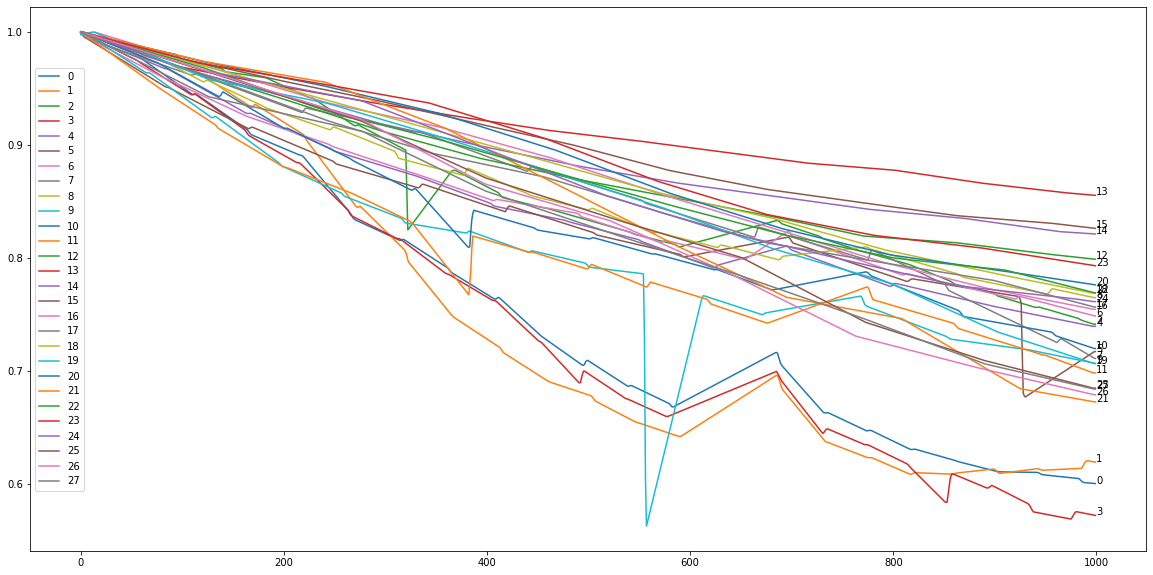

In [7]:
plt.figure(figsize=(20,10))

for i, batt in enumerate(cap_mat):
    if i<=27:
        plt.plot(np.arange(batt.shape[0]), batt, label=i)
        plt.text(batt.shape[0], batt[-1], i)
plt.legend(loc='center left')

## Detrend the data

In [8]:
detrended_cap = np.zeros(cap_mat.shape)
for i in range(cap_mat.shape[0]):
    lin_reg = LinearRegression()
    cap = cap_mat[i][:100].reshape(-1,1)
    lin_reg.fit(np.arange(100).reshape(-1,1),cap)
    cap_pred = lin_reg.predict(np.arange(1000).reshape(-1,1)).reshape(1,-1)[0]
    detrended_cap[i] = cap_pred
    # plt.plot(np.arange(1000), cap_mat[i])
    # plt.plot(np.arange(1000), cap_pred)
    # plt.twinx()
    # plt.plot(cap_pred-cap_mat[i], '--r')
    # plt.show()
    

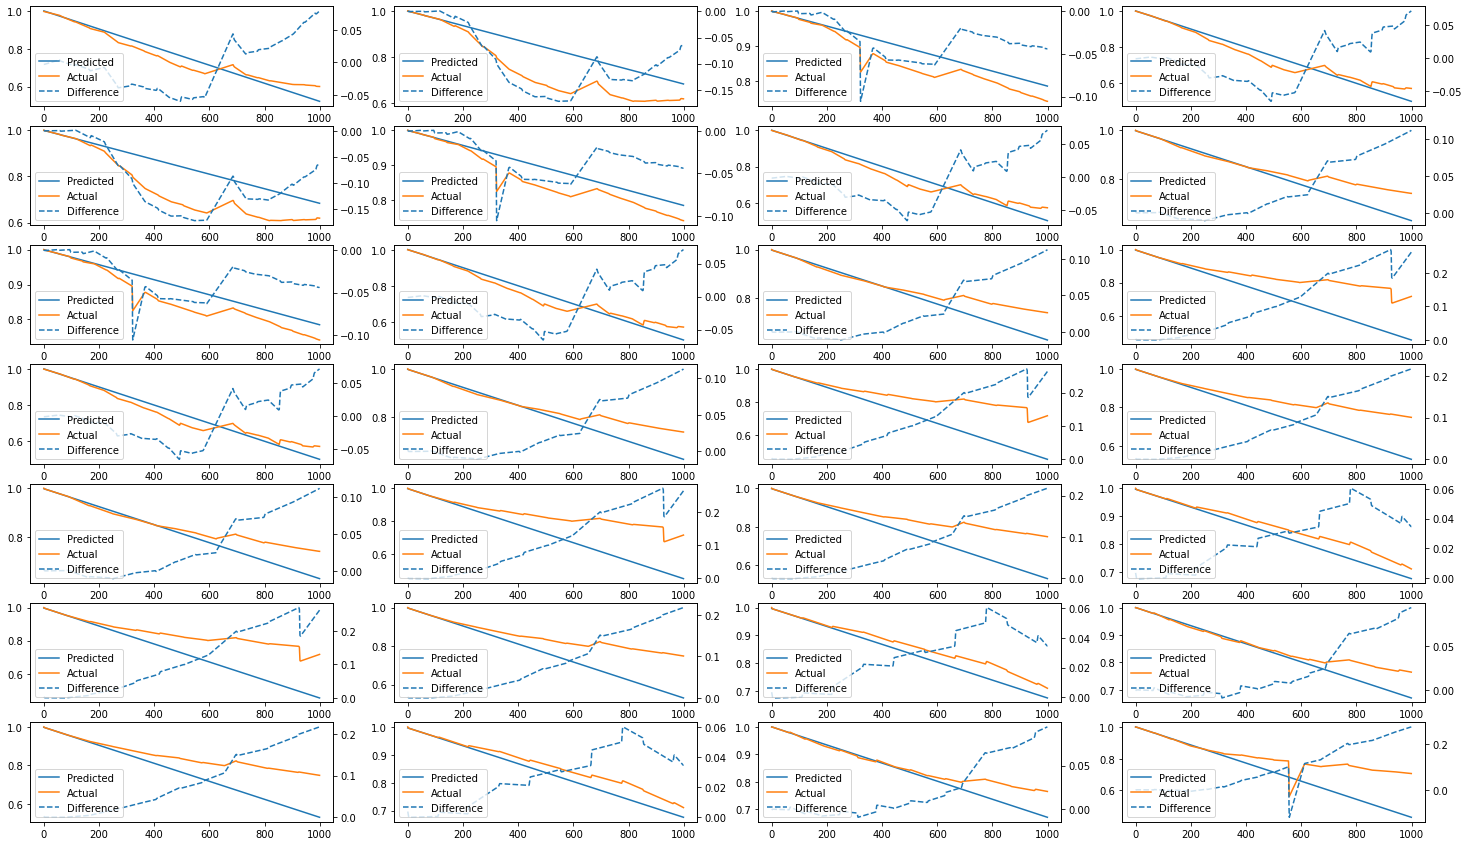

In [9]:
fig, ax = plt.subplots(7,4, figsize=(25,15))
for irows, rows in enumerate(range(7)):
    for icols, cols in enumerate(range(4)):
        ax[rows, cols].plot(detrended_cap[irows+icols], label='Predicted')
        ax[rows, cols].plot(cap_mat[irows+icols], label='Actual')
        ax2=ax[rows, cols].twinx()
        ax2.plot(cap_mat[irows+icols]-detrended_cap[irows+icols], '--', label='Difference')
        lines, labels = ax[rows, cols].get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines+lines2, labels+labels2, loc='lower left')

# Problem statement - given 10% or 5% capacity data, can we predict the capacity curves?

## Start training

In [10]:
def split_data(series, input_size=100, output_size=5):
    total_shape = input_size+output_size
    slices_ = np.zeros((total_shape,1))
    
    for ibat, battery in enumerate(series):
        for slice_ in range(battery.shape[0]):
            if battery[slice(slice_, slice_+total_shape, 1)].shape[0] < total_shape:
                break
            slices_ = np.c_[slices_, battery[slice(slice_, slice_+total_shape, 1)].reshape(-1,1)]
    slices_ = slices_[:,1:].T
    return slices_[..., np.newaxis]

In [11]:
in_seq_size, label_seq_size = 100, 1
windows = split_data(cap_mat, in_seq_size,label_seq_size)

In [12]:
windows.shape

(25200, 101, 1)

Text(0, 0.5, 'Normalized capacity')

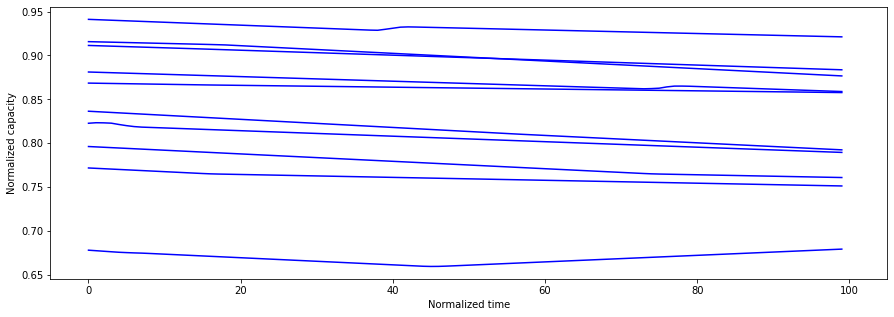

In [13]:
plt.figure(figsize=(15,5))
for i in np.random.choice(np.arange(windows.shape[0]),10):
    plt.plot(np.arange(in_seq_size),windows[i, :in_seq_size],'b')
    plt.plot(np.arange(label_seq_size)+in_seq_size,windows[i, in_seq_size:],'--r')
plt.xlabel('Normalized time')
plt.ylabel('Normalized capacity')

In [14]:
X, y = windows[:, :in_seq_size], windows[:, in_seq_size:]

In [15]:
X.shape, y.shape

((25200, 100, 1), (25200, 1, 1))

In [16]:
train_indices, valid_indices = int(0.7*X.shape[0]), int(0.9*X.shape[0])
X_train, y_train = X[:train_indices,:], y[:train_indices,:]
X_valid, y_valid = X[train_indices:valid_indices,:], y[train_indices:valid_indices,:]
X_test, y_test = X[valid_indices:,:], y[valid_indices:,:]

In [17]:
X_train.shape, X_valid.shape, X_test.shape , y_train.shape, y_valid.shape, y_test.shape

((17640, 100, 1),
 (5040, 100, 1),
 (2520, 100, 1),
 (17640, 1, 1),
 (5040, 1, 1),
 (2520, 1, 1))

## Naive Baseline

In [18]:
def baseline(X):
    return X[:, -1]

In [19]:
y_pred = baseline(X_valid)
np.mean(keras.losses.mean_squared_error(y_pred, y_valid))

0.011522217559693024

In [20]:
def plot_preds(x, y, y_pred):
    plt.plot(np.arange(x.shape[0]), x, 'g')
    plt.plot(np.arange(y.shape[0])+x.shape[0], y, 'k', label='Actual')
    plt.plot(np.arange(y.shape[0])+x.shape[0], y_pred, '-ob', label='Prediction')
    plt.legend()
    plt.grid(True)

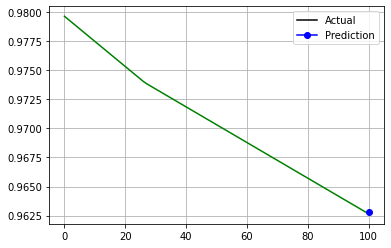

In [21]:
i = np.random.choice(np.arange(X_valid.shape[0]))
plot_preds(X_valid[i], y_valid[i], y_pred[i])

## Dense MLP 

In [22]:
fc = keras.Sequential([
    keras.layers.Flatten(input_shape=[in_seq_size]),
    keras.layers.Dense(1)
])

In [23]:
fc.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [24]:
fc.compile(optimizer=keras.optimizers.Adam(1e-4), loss=keras.losses.mean_squared_error)

In [25]:
hist = fc.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/20
552/552 [==============================] - 1s 1ms/step - loss: 0.0013 - val_loss: 3.4291e-05
Epoch 2/20
552/552 [==============================] - 0s 869us/step - loss: 2.3834e-04 - val_loss: 3.2691e-05
Epoch 3/20
552/552 [==============================] - 0s 862us/step - loss: 2.3444e-04 - val_loss: 3.3788e-05
Epoch 4/20
552/552 [==============================] - 0s 876us/step - loss: 2.2866e-04 - val_loss: 4.4619e-05
Epoch 5/20
552/552 [==============================] - 0s 861us/step - loss: 2.2297e-04 - val_loss: 2.8537e-05
Epoch 6/20
552/552 [==============================] - 0s 869us/step - loss: 2.1317e-04 - val_loss: 2.6366e-05
Epoch 7/20
552/552 [==============================] - 0s 862us/step - loss: 2.0441e-04 - val_loss: 2.4145e-05
Epoch 8/20
552/552 [==============================] - 0s 868us/step - loss: 1.9096e-04 - val_loss: 2.1942e-05
Epoch 9/20
552/552 [==============================] - 0s 859us/step - loss: 1.8228e-04 - val_loss: 2.3771e-05
Epoch 10/20
552/

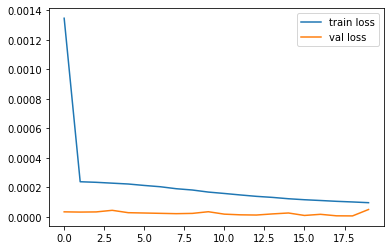

In [26]:
plt.plot(hist.history['loss'], label = 'train loss')
plt.plot(hist.history['val_loss'], label = 'val loss')
plt.legend()

In [27]:
y_pred = fc.predict(X_valid)
np.sqrt(mean_squared_error(y_pred, y_valid[:,:,0]))

0.007081156084711601

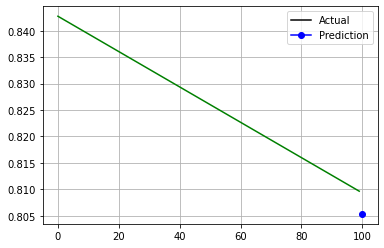

In [28]:
i = np.random.choice(np.arange(X_valid.shape[0]))
plot_preds(X_valid[i], y_valid[i], y_pred[i])

## RNNs

In [29]:
rnn = keras.Sequential([
    keras.layers.SimpleRNN(10, input_shape=[None, 1], return_sequences=True),
    keras.layers.SimpleRNN(10),
    keras.layers.Dense(1)
])

In [30]:
rnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, None, 10)          120       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________


In [31]:
rnn.compile(optimizer=keras.optimizers.Adam(1e-3), loss=keras.losses.mean_squared_error)

In [32]:
hist = rnn.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/20
552/552 [==============================] - 14s 24ms/step - loss: 0.1464 - val_loss: 6.5758e-06
Epoch 2/20
552/552 [==============================] - 13s 23ms/step - loss: 3.0988e-05 - val_loss: 5.2539e-06
Epoch 3/20
552/552 [==============================] - 13s 23ms/step - loss: 3.0381e-05 - val_loss: 4.2084e-06
Epoch 4/20
552/552 [==============================] - 13s 23ms/step - loss: 2.9962e-05 - val_loss: 8.7168e-06
Epoch 5/20
552/552 [==============================] - 13s 23ms/step - loss: 2.9423e-05 - val_loss: 3.3376e-06
Epoch 6/20
552/552 [==============================] - 13s 23ms/step - loss: 2.8202e-05 - val_loss: 2.9638e-06
Epoch 7/20
552/552 [==============================] - 13s 24ms/step - loss: 2.7777e-05 - val_loss: 7.0978e-06
Epoch 8/20
552/552 [==============================] - 13s 23ms/step - loss: 2.6409e-05 - val_loss: 1.6553e-06
Epoch 9/20
552/552 [==============================] - 13s 23ms/step - loss: 2.6159e-05 - val_loss: 1.3708e-06
Epoch 10/20
55

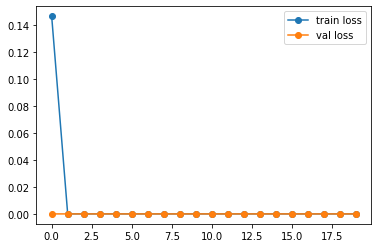

In [33]:
plt.plot(hist.history['loss'], '-o', label = 'train loss')
plt.plot(hist.history['val_loss'], '-o', label = 'val loss')
plt.legend()

In [34]:
y_pred = rnn.predict(X_valid)
np.mean(keras.losses.mean_squared_error(y_pred, y_valid))

0.011535397149471424

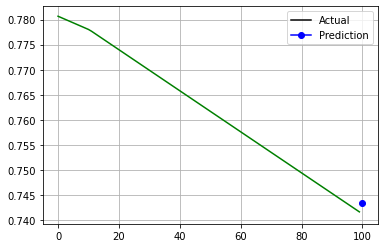

In [35]:
i = np.random.choice(np.arange(X_valid.shape[0]))
plot_preds(X_valid[i], y_valid[i], y_pred[i])

## Forecasting several timesteps ahead

In [36]:
in_seq_size, label_seq_size = 100, 10
windows_new = split_data(cap_mat, in_seq_size,label_seq_size)

In [37]:
X_new, y_new = windows_new[:, :in_seq_size], windows_new[:, in_seq_size:]
X_new.shape, y_new.shape

((24948, 100, 1), (24948, 10, 1))

In [38]:
def multi_step_predict(X_new, y_new, model):
    X = X_new
    for time in range(label_seq_size):
        y_pred = model.predict(X[:,time:,:])
        X = np.c_[X[...,0], y_pred][...,np.newaxis]
    Y_pred = X[:,in_seq_size:]
    return Y_pred

In [39]:
Y_pred = multi_step_predict(X_new, y_new, rnn)

Text(0.5, 1.0, '8474')

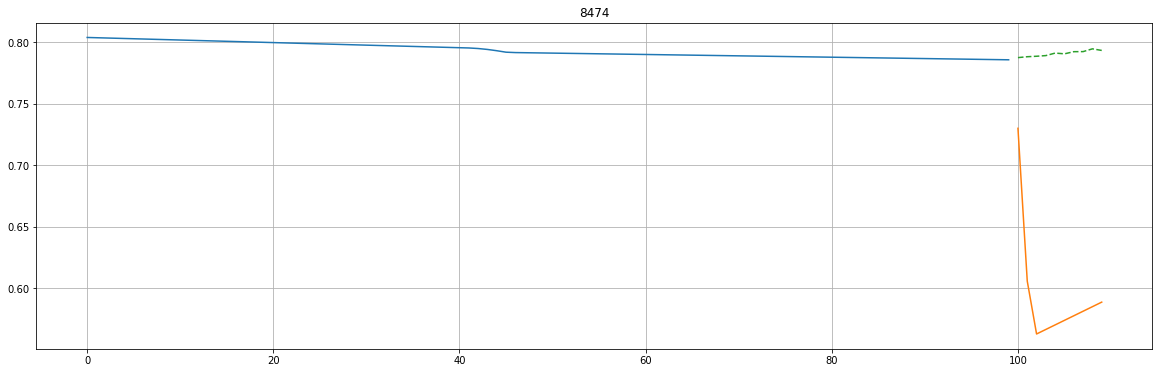

In [40]:
plt.figure(figsize=(20,6))
i = 8474 #np.random.choice(np.arange(X_new.shape[0]))
plt.plot(X_new[i])
plt.plot(np.arange(label_seq_size)+in_seq_size, y_new[i])
plt.plot(np.arange(label_seq_size)+in_seq_size, Y_pred[i], '--')
plt.grid(True)
plt.title(i)

In [41]:
np.mean(keras.losses.mean_squared_error(Y_pred, y_new))

6.918989524123781e-05

## Seq2Vec RNN

In [42]:
seq2vec = keras.Sequential([
    keras.layers.SimpleRNN(10, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(10),
    keras.layers.Dense(label_seq_size)
])

In [43]:
seq2vec.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, None, 10)          120       
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 440
Trainable params: 440
Non-trainable params: 0
_________________________________________________________________


In [44]:
seq2vec.compile(optimizer=keras.optimizers.Adam(1e-4), loss=keras.losses.mean_squared_error)

In [45]:
hist = seq2vec.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/20
552/552 [==============================] - 14s 23ms/step - loss: 0.6291 - val_loss: 0.2919
Epoch 2/20
552/552 [==============================] - 13s 23ms/step - loss: 0.1424 - val_loss: 0.0731
Epoch 3/20
552/552 [==============================] - 13s 23ms/step - loss: 0.0351 - val_loss: 0.0196
Epoch 4/20
552/552 [==============================] - 13s 23ms/step - loss: 0.0108 - val_loss: 0.0077
Epoch 5/20
552/552 [==============================] - 13s 24ms/step - loss: 0.0065 - val_loss: 0.0055
Epoch 6/20
552/552 [==============================] - 13s 23ms/step - loss: 0.0055 - val_loss: 0.0047
Epoch 7/20
552/552 [==============================] - 13s 23ms/step - loss: 0.0047 - val_loss: 0.0039
Epoch 8/20
552/552 [==============================] - 13s 23ms/step - loss: 0.0038 - val_loss: 0.0032
Epoch 9/20
552/552 [==============================] - 13s 23ms/step - loss: 0.0028 - val_loss: 0.0022
Epoch 10/20
552/552 [==============================] - 13s 23ms/step - loss: 0.001

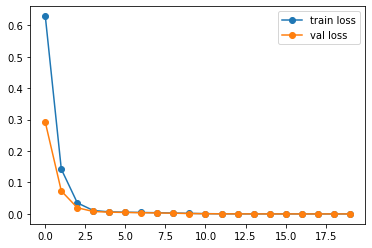

In [46]:
plt.plot(hist.history['loss'], '-o', label = 'train loss')
plt.plot(hist.history['val_loss'], '-o', label = 'val loss')
plt.legend()

In [47]:
y_pred = seq2vec.predict(X_new)
np.mean(keras.losses.mean_squared_error(y_pred, y_new[...,0]))

3.530068153611359e-05

Text(0.5, 1.0, '24521')

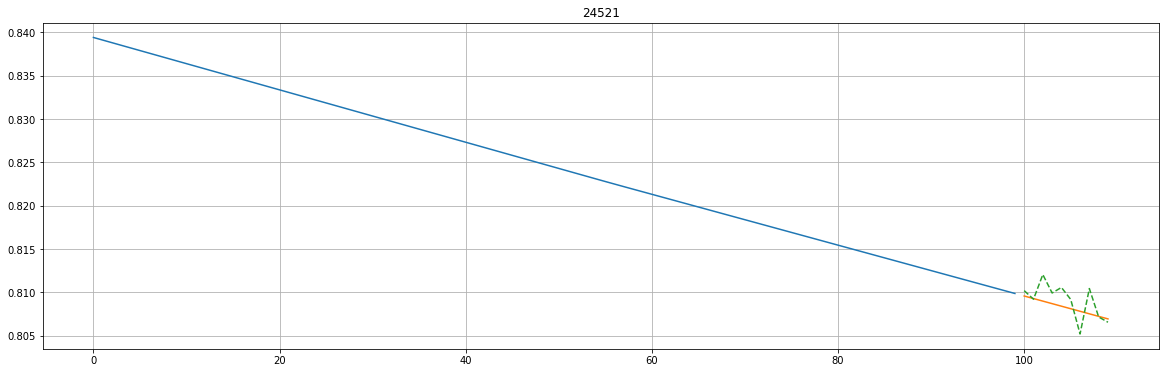

In [48]:
plt.figure(figsize=(20,6))
i = np.random.choice(np.arange(X_new.shape[0]))
plt.plot(X_new[i])
plt.plot(np.arange(label_seq_size)+in_seq_size, y_new[i])
plt.plot(np.arange(label_seq_size)+in_seq_size, y_pred[i], '--')
plt.grid(True)
plt.title(i)

## Skip connection to Seq2vec model

In [49]:
input_ = keras.layers.Input((None,1), dtype=tf.float32)
l = keras.layers.SimpleRNN(10, return_sequences=True)(input_)
l = keras.layers.SimpleRNN(10)(l)

l1 = keras.layers.Dense(10)(input_)
l1 = keras.layers.Dense(label_seq_size)(l1+input_)
seq2vec_res = keras.models.Model(inputs=[input_], outputs=[l1])

In [50]:
seq2vec_res.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, 1)]    0           []                               
                                                                                                  
 dense_3 (Dense)                (None, None, 10)     20          ['input_1[0][0]']                
                                                                                                  
 tf.__operators__.add (TFOpLamb  (None, None, 10)    0           ['dense_3[0][0]',                
 da)                                                              'input_1[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, None, 10)     110         ['tf.__operators__.add[0][0]'

In [51]:
keras.utils.plot_model(seq2vec_res)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [52]:
seq2vec_res.compile(optimizer=keras.optimizers.Adam(1e-5), loss=keras.losses.mean_absolute_error)

In [53]:
hist = seq2vec_res.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/100
552/552 [==============================] - 1s 2ms/step - loss: 1.2187 - val_loss: 1.2265
Epoch 2/100
552/552 [==============================] - 1s 1ms/step - loss: 1.1595 - val_loss: 1.1664
Epoch 3/100
552/552 [==============================] - 1s 1ms/step - loss: 1.1030 - val_loss: 1.1101
Epoch 4/100
552/552 [==============================] - 1s 1ms/step - loss: 1.0489 - val_loss: 1.0551
Epoch 5/100
552/552 [==============================] - 1s 1ms/step - loss: 0.9962 - val_loss: 1.0021
Epoch 6/100
552/552 [==============================] - 1s 1ms/step - loss: 0.9469 - val_loss: 0.9531
Epoch 7/100
552/552 [==============================] - 1s 2ms/step - loss: 0.9006 - val_loss: 0.9071
Epoch 8/100
552/552 [==============================] - 1s 1ms/step - loss: 0.8582 - val_loss: 0.8648
Epoch 9/100
552/552 [==============================] - 1s 1ms/step - loss: 0.8173 - val_loss: 0.8232
Epoch 10/100
552/552 [==============================] - 1s 1ms/step - loss: 0.7770 - val_lo

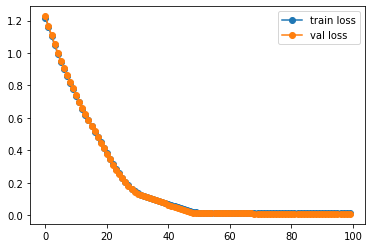

In [54]:
plt.plot(hist.history['loss'], '-o', label = 'train loss')
plt.plot(hist.history['val_loss'], '-o', label = 'val loss')
plt.legend()

In [55]:
y_pred = seq2vec_res.predict(X_valid)
np.mean(keras.losses.mean_squared_error(y_pred, y_valid)), np.mean(keras.losses.mean_absolute_error(y_pred, y_valid))

(0.0001532297216002944, 0.00885266794578159)

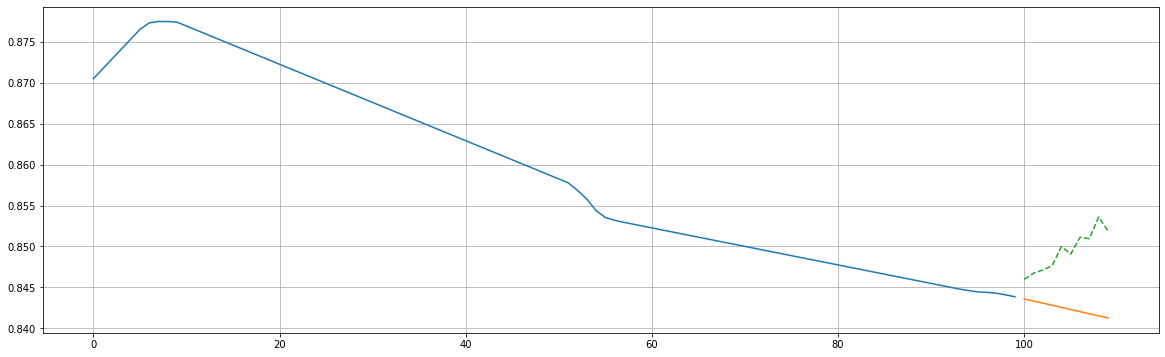

In [56]:
plt.figure(figsize=(20,6))
i = np.random.choice(np.arange(X_new.shape[0]))
plt.plot(X_new[i])
plt.plot(np.arange(label_seq_size)+in_seq_size, y_new[i])
plt.plot(np.arange(label_seq_size)+in_seq_size, Y_pred[i], '--')
plt.grid(True)

## Seq2seq model

In [57]:
seq2seq = keras.Sequential([
    keras.layers.SimpleRNN(10, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(10, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(label_seq_size))
])

In [58]:
seq2seq.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, None, 10)          120       
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, None, 10)          210       
                                                                 
 time_distributed (TimeDistr  (None, None, 10)         110       
 ibuted)                                                         
                                                                 
Total params: 440
Trainable params: 440
Non-trainable params: 0
_________________________________________________________________


In [59]:
def last_time_step_mse(y, y_pred):
    return keras.losses.mean_squared_error(y[:,-1], y_pred[:,-1])

In [60]:
seq2seq.compile(optimizer=keras.optimizers.Adam(1e-4), loss=[last_time_step_mse])

In [61]:
hist = seq2seq.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/20
552/552 [==============================] - 14s 24ms/step - loss: 0.3015 - val_loss: 0.0986
Epoch 2/20
552/552 [==============================] - 13s 23ms/step - loss: 0.0372 - val_loss: 0.0141
Epoch 3/20
552/552 [==============================] - 13s 23ms/step - loss: 0.0079 - val_loss: 0.0058
Epoch 4/20
552/552 [==============================] - 13s 23ms/step - loss: 0.0056 - val_loss: 0.0049
Epoch 5/20
552/552 [==============================] - 13s 24ms/step - loss: 0.0047 - val_loss: 0.0040
Epoch 6/20
552/552 [==============================] - 13s 24ms/step - loss: 0.0034 - val_loss: 0.0027
Epoch 7/20
552/552 [==============================] - 13s 23ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 8/20
552/552 [==============================] - 13s 23ms/step - loss: 9.8317e-04 - val_loss: 7.0349e-04
Epoch 9/20
552/552 [==============================] - 13s 23ms/step - loss: 5.4002e-04 - val_loss: 4.4697e-04
Epoch 10/20
552/552 [==============================] - 13s 23ms/st

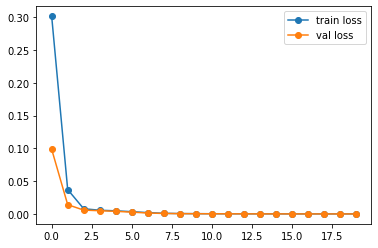

In [62]:
plt.plot(hist.history['loss'], '-o', label = 'train loss')
plt.plot(hist.history['val_loss'], '-o', label = 'val loss')
plt.legend()

In [63]:
y_pred = seq2seq.predict(X_valid)[:,-1][..., np.newaxis]
np.mean(keras.losses.mean_squared_error(y_pred, y_valid))

1.2922012643146152e-05

In [64]:
y_pred.shape

(5040, 10, 1)

IndexError: index 12342 is out of bounds for axis 0 with size 5040

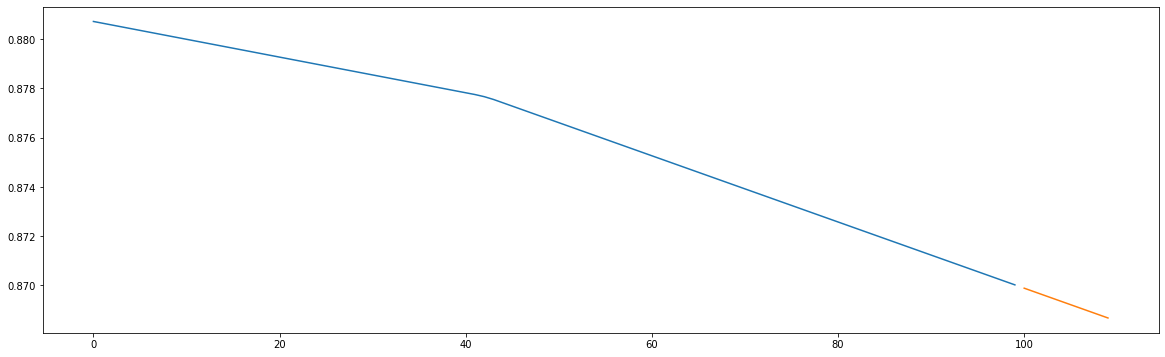

In [65]:
plt.figure(figsize=(20,6))
i = np.random.choice(np.arange(X_new.shape[0]))
plt.plot(X_new[i])
plt.plot(np.arange(label_seq_size)+in_seq_size, y_new[i])
plt.plot(np.arange(label_seq_size)+in_seq_size, y_pred[i], '--')
plt.grid(True)
plt.title(i)

## Predicting the full capacity curve

In [ ]:
X_new.shape

In [ ]:
seq2vec.predict(X_new).shape

In [ ]:
for i in range(20):
    X_new = cap_mat[i][:in_seq_size].reshape(1,-1,1)
    y_new = cap_mat[i][in_seq_size:].reshape(1,-1,1)
    
    plt.figure(figsize=(15,5))
    plt.plot(X_new[0])
    plt.plot(np.arange(500)+500,y_new[0])
    plt.plot(np.arange(500)+500,seq2seq.predict(X_new)[:,:,0].T,'--')
    
    plt.plot(cap_mat[i][:in_seq_size], '--k')
    plt.plot(np.arange(500)+500, cap_mat[i][in_seq_size:], '--b')
    
    plt.grid(True)
    plt.title(i)
    plt.show()